In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from os.path import join

In [2]:
df = pd.read_csv('data/game5.csv')
df.set_index("GameId", inplace=True)
df

,TotalMatchesA,TotalWinsA,TotalLossesA,TotalPointsA,TotalScoreForA,TotalScoreAgainstA,TotalMatchesB,TotalWinsB,TotalLossesB,TotalPointsB,TotalScoreForB,TotalScoreAgainstB,Winner
GameId,,,,,,,,,,,,,
100016145,29,21,8,63,24,10,26,6,19,18,7,19,A
100016146,29,12,17,36,14,20,28,16,12,48,18,12,A
100016147,29,13,16,39,14,19,26,12,14,36,12,14,B
100016148,28,13,15,39,13,17,29,17,11,51,19,14,B
100016149,28,13,15,39,15,17,28,16,12,48,18,12,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100016116,25,3,22,9,12,46,26,6,20,18,19,45,A
100016117,26,12,14,36,30,36,26,14,12,42,34,30,B
100016118,26,21,5,63,46,16,26,16,10,48,36,23,A


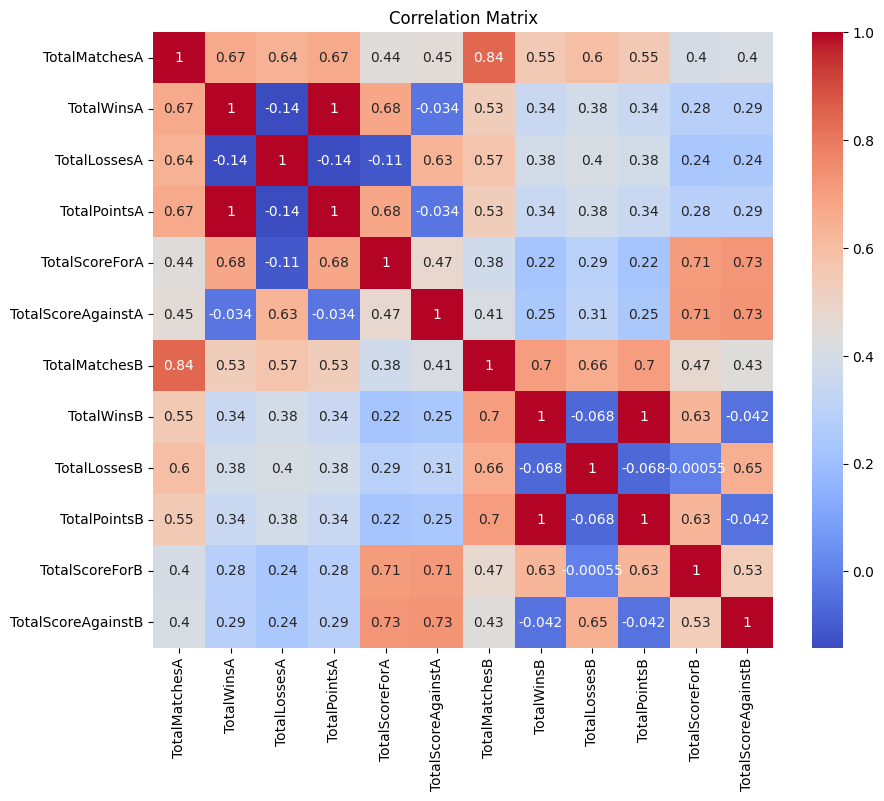

In [3]:
import seaborn as sns

X = df.drop("Winner", axis=1)
y = df["Winner"]

# Assuming your dataset is stored in a DataFrame called 'df'
correlation_matrix = X.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

As we can see, Total Wins and Total Points are really corellated, so we need to drop one of those features for each team. Also. we don't need Total Matches, high correlated and partially could be taken from other columns.

In [4]:
X = X.drop("TotalPointsA", axis=1)
X = X.drop("TotalPointsB", axis=1)
X = X.drop("TotalMatchesA", axis=1)
X = X.drop("TotalMatchesB", axis=1)

In [5]:
find_match = pd.read_csv("data/to_predict.csv")
find_match = find_match.drop("TotalPointsA", axis=1)
find_match = find_match.drop("TotalPointsB", axis=1)
find_match = find_match.drop("TotalMatchesA", axis=1)
find_match = find_match.drop("TotalMatchesB", axis=1)
find_match.set_index("GameId", inplace=True)
find_match

,TotalWinsA,TotalLossesA,TotalScoreForA,TotalScoreAgainstA,TotalWinsB,TotalLossesB,TotalScoreForB,TotalScoreAgainstB
GameId,,,,,,,,
100017077,10,17,25,39,14,13,33,30


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Print the predicted winners
print(predictions)

['A' 'Draw' 'B' 'B' 'A' 'B' 'Draw' 'Draw' 'Draw' 'B' 'A' 'B' 'A' 'A' 'B'
 'Draw' 'B' 'A' 'A' 'A' 'A' 'B' 'A' 'B' 'A' 'A' 'B' 'B' 'Draw' 'Draw' 'A'
 'Draw' 'B' 'A' 'A' 'B' 'B' 'Draw' 'Draw' 'B' 'A' 'B' 'B' 'Draw' 'A' 'A'
 'Draw' 'A' 'Draw' 'A' 'B' 'A' 'Draw' 'B' 'Draw' 'A' 'Draw' 'A' 'Draw' 'B'
 'B' 'A' 'Draw' 'A' 'Draw' 'B' 'A' 'B' 'A' 'B' 'A' 'Draw' 'B' 'B' 'Draw'
 'A' 'A' 'Draw' 'B' 'B' 'A' 'A' 'B' 'Draw' 'Draw' 'B' 'Draw' 'A' 'B'
 'Draw' 'Draw' 'B' 'B' 'Draw' 'B' 'B' 'A' 'A' 'Draw' 'Draw' 'A' 'A' 'A'
 'Draw' 'B' 'B' 'B' 'A' 'B' 'Draw' 'B' 'Draw' 'A' 'B' 'Draw' 'A' 'Draw'
 'A' 'Draw' 'A' 'B' 'Draw' 'Draw' 'Draw' 'Draw' 'Draw' 'Draw' 'Draw'
 'Draw' 'Draw' 'B' 'B' 'Draw' 'B' 'A' 'A' 'A' 'B' 'Draw' 'A' 'A' 'Draw'
 'Draw' 'B' 'Draw' 'B' 'Draw' 'A' 'A' 'A' 'Draw' 'Draw' 'A' 'A' 'A' 'B'
 'B' 'A' 'A' 'Draw' 'Draw' 'A' 'B' 'B' 'B' 'B' 'Draw' 'Draw' 'A' 'A' 'B'
 'B' 'Draw' 'Draw' 'Draw' 'Draw' 'Draw' 'B' 'Draw' 'A' 'A' 'A' 'B' 'B' 'B'
 'A' 'B' 'Draw' 'B' 'B' 'A' 'Draw' 'B' 'B' 'B' 'B' 'Draw' 

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Define the classifiers and their corresponding parameter grids
classifiers = [
    {
        'classifier': RandomForestClassifier(),
        'param_grid': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    {
        'classifier': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    {
        'classifier': SVC(),
        'param_grid': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly']
        }
    },
    {
        'classifier': DecisionTreeClassifier(),
        'param_grid': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
]

# Iterate over classifiers
for classifier in classifiers:
    # Create GridSearchCV object
    grid_search = GridSearchCV(estimator=classifier['classifier'], param_grid=classifier['param_grid'], cv=5)
    
    # Fit the GridSearchCV object to the data
    grid_search.fit(X, y)
    
    # Print the best parameters and best score
    print("Classifier:", classifier['classifier'].__class__.__name__)
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", grid_search.best_score_)
    print()


Classifier: RandomForestClassifier
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.46184276956364945

Classifier: KNeighborsClassifier
Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}
Best Score: 0.4456869816083664

Classifier: SVC
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Best Score: 0.4600649116480346

Classifier: DecisionTreeClassifier
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.4295888928957807



In [10]:
classifier = RandomForestClassifier(max_depth=10)
classifier.fit(X, y)
predictions = classifier.predict(find_match)
predictions[0]

'Draw'